<a href="https://colab.research.google.com/github/norasaleh1/project236/blob/main/miningP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

our goal is to predict whether a student is at risk of depression based in factors such as dietary habits, academic pressure, sleep duration and more.

the link to our dataset's source: https://www.kaggle.com/datasets/ikynahidwin/depression-student-dataset


In our dataset we have 11 different
attributes and 502 objects (entries),
where type of attributes are:
(Gender) binary
(Age) numeric
(Academic Pressure) numeric
(Study satisfaction) numeric
(Sleep Duration) nominal
(Dietary Habits) nominal
(Have you ever had suicidal thoughts ?)binary
(Study Hours) numeric
(Financial Stress	)numeric
(Family History of Mental Illness	)binary
(Depression)binary
and we have the attribute Depression as our class label



In [ ]:

import os
os.getcwd()



In [ ]:
import pandas as pd
df = pd.read_csv('/Depression Student Dataset 2.csv')
print(df)

     Gender  Age  Academic Pressure  Study Satisfaction     Sleep Duration  \
0      Male   28                2.0                 4.0          7-8 hours   
1      Male   28                4.0                 5.0          5-6 hours   
2      Male   25                1.0                 3.0          5-6 hours   
3      Male   23                1.0                 4.0  More than 8 hours   
4    Female   31                1.0                 5.0  More than 8 hours   
..      ...  ...                ...                 ...                ...   
497    Male   26                5.0                 2.0  More than 8 hours   
498    Male   24                2.0                 1.0  Less than 5 hours   
499  Female   23                3.0                 5.0          5-6 hours   
500    Male   33                4.0                 4.0  More than 8 hours   
501    Male   18                5.0                 3.0  More than 8 hours   

    Dietary Habits Have you ever had suicidal thoughts ?  Study

In [ ]:
print("First 5 rows of the dataset:")
print(df.head())


First 5 rows of the dataset:
   Gender  Age  Academic Pressure  Study Satisfaction     Sleep Duration  \
0    Male   28                2.0                 4.0          7-8 hours   
1    Male   28                4.0                 5.0          5-6 hours   
2    Male   25                1.0                 3.0          5-6 hours   
3    Male   23                1.0                 4.0  More than 8 hours   
4  Female   31                1.0                 5.0  More than 8 hours   

  Dietary Habits Have you ever had suicidal thoughts ?  Study Hours  \
0       Moderate                                   Yes            9   
1        Healthy                                   Yes            7   
2      Unhealthy                                   Yes           10   
3      Unhealthy                                   Yes            7   
4        Healthy                                   Yes            4   

   Financial Stress Family History of Mental Illness Depression  
0                 2  

In [ ]:
print("\nGeneral information about the dataset:")
print(df.info())



General information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 502 non-null    object 
 1   Age                                    502 non-null    int64  
 2   Academic Pressure                      502 non-null    float64
 3   Study Satisfaction                     502 non-null    float64
 4   Sleep Duration                         502 non-null    object 
 5   Dietary Habits                         502 non-null    object 
 6   Have you ever had suicidal thoughts ?  502 non-null    object 
 7   Study Hours                            502 non-null    int64  
 8   Financial Stress                       502 non-null    int64  
 9   Family History of Mental Illness       502 non-null    object 
 10  Depression                        

In [ ]:
print("\nDescriptive statistics of the dataset:")
print(df.describe())


Descriptive statistics of the dataset:
              Age  Academic Pressure  Study Satisfaction  Study Hours  \
count  502.000000         502.000000          502.000000   502.000000   
mean    26.241036           3.003984            3.075697     6.404382   
std      4.896501           1.390007            1.373490     3.742434   
min     18.000000           1.000000            1.000000     0.000000   
25%     22.000000           2.000000            2.000000     3.000000   
50%     26.500000           3.000000            3.000000     7.000000   
75%     30.000000           4.000000            4.000000    10.000000   
max     34.000000           5.000000            5.000000    12.000000   

       Financial Stress  
count        502.000000  
mean           2.928287  
std            1.425053  
min            1.000000  
25%            2.000000  
50%            3.000000  
75%            4.000000  
max            5.000000  


In [ ]:
plt.figure(figsize=(15, 5))

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

In [ ]:
class_counts = df['Depression'].value_counts()
class_percentage = df['Depression'].value_counts(normalize=True) * 100

print("\nClass Imbalance Analysis:")
print(f"Number of cases in each class:\n{class_counts}")
print(f"\nPercentage of each class:\n{class_percentage.round(2)}")


Class Imbalance Analysis:
Number of cases in each class:
Depression
Yes    252
No     250
Name: count, dtype: int64

Percentage of each class:
Depression
Yes    50.2
No     49.8
Name: proportion, dtype: float64


In [ ]:
print("\nNumber of missing values in each column:")
print(df.isnull().sum())



Number of missing values in each column:
Gender                                   0
Age                                      0
Academic Pressure                        0
Study Satisfaction                       0
Sleep Duration                           0
Dietary Habits                           0
Have you ever had suicidal thoughts ?    0
Study Hours                              0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64


Text(0, 0.5, 'Count')

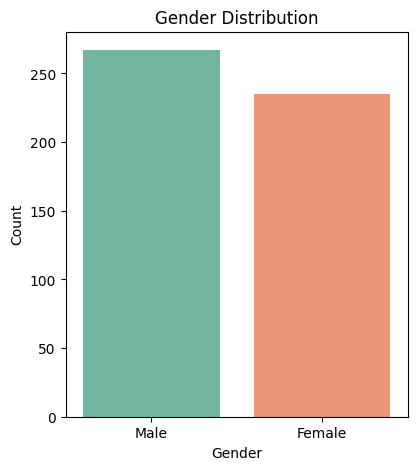

In [ ]:
plt.figure(figsize=(15, 5))

# Gender distribution
plt.subplot(1, 3, 1)
sns.countplot(x='Gender', hue='Gender', data=df, palette='Set2', legend=False)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

The dataset contains a column named "Gender", which we will use to analyze the gender distribution. Now, I'll count the occurrences of each gender and describe the result in words.

The dataset consists of 267 males and 235 females. This indicates that the number of male participants is slightly higher than the number of female participants. ​

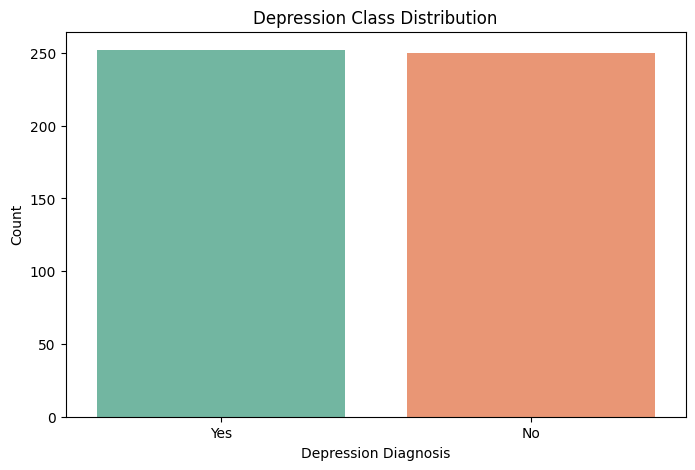

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(
    x=class_counts.index,
    y=class_counts.values,
    hue=class_counts.index,  # Added `hue`
    palette='Set2',
    legend=False  # Disable legend
)
plt.title('Depression Class Distribution')
plt.xlabel('Depression Diagnosis')
plt.ylabel('Count')
plt.show()


he depression class distribution in the dataset shows how many students have been classified as experiencing depression versus those who have not. This provides insight into the proportion of students potentially struggling with mental health issues compared to those who are not.

Text(0, 0.5, 'Count')

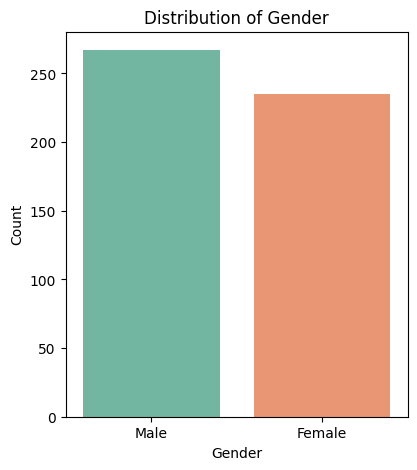

In [ ]:
plt.figure(figsize=(15, 5))


plt.subplot(1, 3, 1)
sns.countplot(x='Gender', hue='Gender', data=df, palette='Set2', legend=False)
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

The gender distribution in the dataset shows that there are 267 males and 235 females. This means that the number of male participants is slightly higher than the number of female participants. The difference is not very large, but it indicates a small imbalance in gender representation within the dataset.

Text(0, 0.5, 'Count')

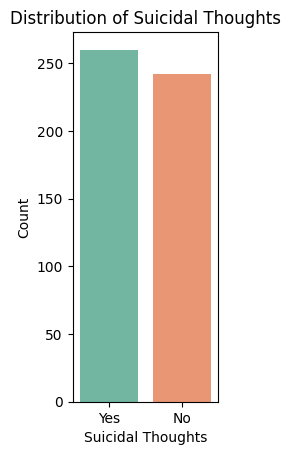

In [ ]:

plt.subplot(1, 3, 2)
sns.countplot(x='Have you ever had suicidal thoughts ?',
              hue='Have you ever had suicidal thoughts ?',
              data=df, palette='Set2', legend=False)
plt.title('Distribution of Suicidal Thoughts')
plt.xlabel('Suicidal Thoughts')
plt.ylabel('Count')

The distribution of suicidal thoughts in the dataset indicates the number of students who have experienced suicidal thoughts compared to those who have not. This provides insight into the prevalence of mental health struggles among students.

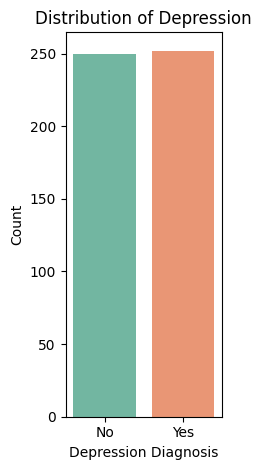

In [ ]:

plt.subplot(1, 3, 3)
sns.countplot(x='Depression', hue='Depression', data=df, palette='Set2', legend=False)
plt.title('Distribution of Depression')
plt.xlabel('Depression Diagnosis')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

shows the count of individuals with and without depression, using different colors for each category. It visually represents how many people fall into each depression diagnosis group.

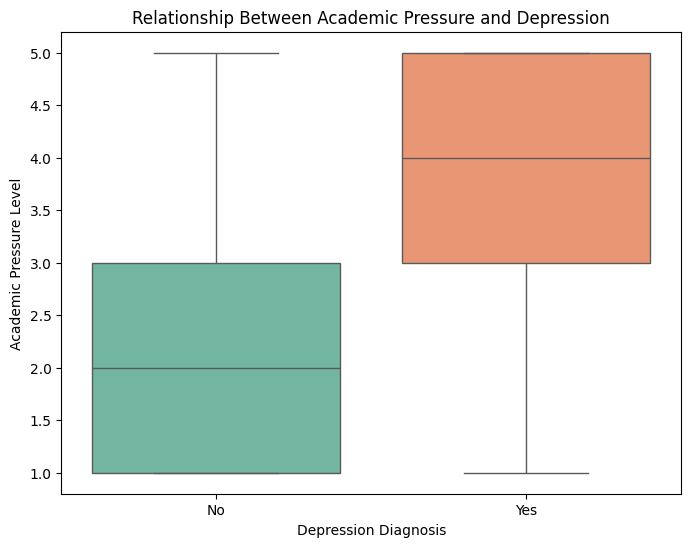

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(
    x='Depression',
    y='Academic Pressure',
    data=df,
    hue='Depression',
    palette='Set2',
    legend=False
)
plt.title('Relationship Between Academic Pressure and Depression')
plt.xlabel('Depression Diagnosis')
plt.ylabel('Academic Pressure Level')
plt.show()

 shows the relationship between academic pressure and depression diagnosis, with separate boxplots for each depression category. It highlights how academic pressure levels vary across different depression groups.









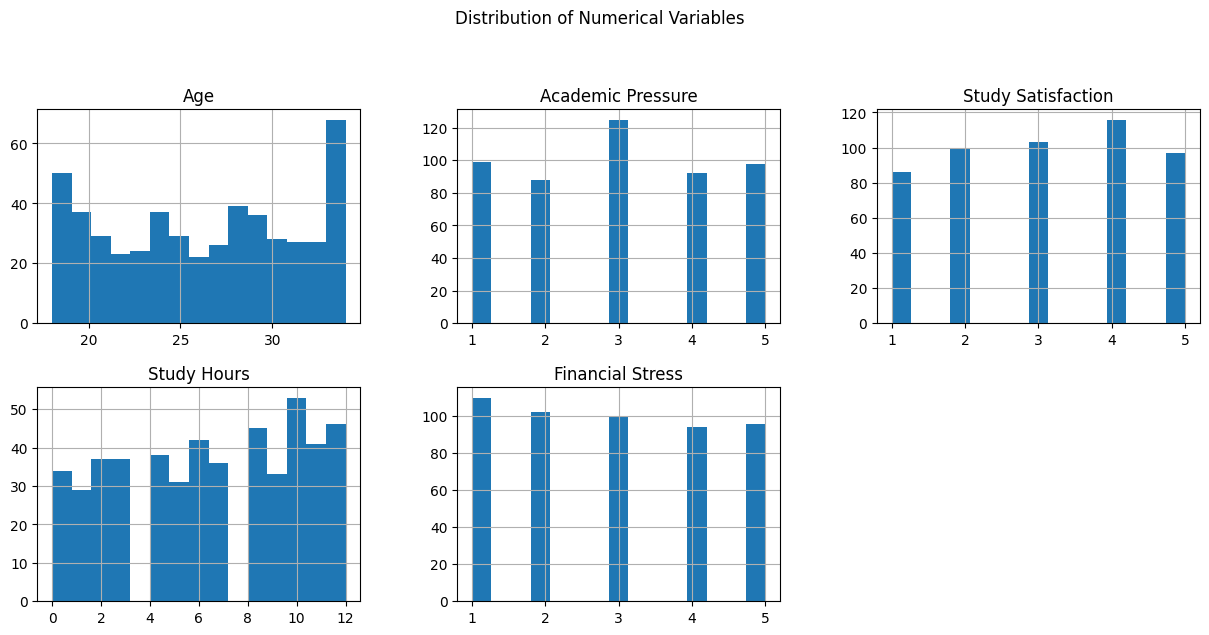

In [ ]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_columns].hist(bins=15, figsize=(15, 10), layout=(3, 3))
plt.suptitle('Distribution of Numerical Variables')
plt.show()

The plot displays histograms for all numerical variables in the dataset, showing their distributions. Each histogram represents the frequency of values for a specific numerical column, with 15 bins for better granularity.







